<a href="https://colab.research.google.com/github/Az140304/MachineLearning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

In [6]:
%pip install tensorflow pandas matplotlib seaborn numpy scipy kaggle

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached kaggle-1.6.17.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl.metadata (806 bytes)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.6 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.6 MB 6.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.6 MB 6.3 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/11.6 MB 6.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.6 MB 6.4 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [1]:
!wget "https://drive.usercontent.google.com/download?id=1YMlfMalleO11EQM9DCpz-rmFsAdvRMPt&export=download&authuser=0&confirm=t&uuid=c24ffb34-fa9b-47ab-bee9-d04f60d15a1d&at=AENtkXYQUhLcbm4sgo7687PqTZD8:1732802044190" -O trash_data.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!unzip -o -q trash_data.zip -d data

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [15]:
data_dir = 'data'
os.listdir(data_dir)

['battery',
 'bottlecap',
 'bulb',
 'cans',
 'cardboard',
 'ceramicsbowl',
 'disc',
 'galvanizedsteel',
 'glassbottle',
 'Kain',
 'newspaper',
 'paper',
 'pen',
 'plasticbag',
 'plasticbottle',
 'plasticene',
 'rag',
 'rope',
 'spoonfork',
 'tire',
 'watergallon',
 'zincroof']

In [7]:
data_dir = "data/"

In [10]:
print(len(tf.config.list_physical_devices('GPU')))

0


# Exploratory Dataset

In [22]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
data_flow = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 23087 images belonging to 22 classes.


In [17]:
class_labels = list(data_flow.class_indices.keys())
total_label = len(class_labels)

print("Total kategori yang ada : ", total_label)
print("Kategori yang ada:", class_labels)

Total kategori yang ada :  22
Kategori yang ada: ['Kain', 'battery', 'bottlecap', 'bulb', 'cans', 'cardboard', 'ceramicsbowl', 'disc', 'galvanizedsteel', 'glassbottle', 'newspaper', 'paper', 'pen', 'plasticbag', 'plasticbottle', 'plasticene', 'rag', 'rope', 'spoonfork', 'tire', 'watergallon', 'zincroof']


In [18]:
from collections import Counter

class_counts = Counter()
for label in class_labels:
    class_counts[label] = len(os.listdir(os.path.join(data_dir, label)))

print("Distribusi gambar per kategori:", class_counts)

Distribusi gambar per kategori: Counter({'bottlecap': 1218, 'plasticene': 1152, 'tire': 1152, 'pen': 1121, 'plasticbag': 1111, 'newspaper': 1097, 'rag': 1093, 'plasticbottle': 1087, 'spoonfork': 1087, 'ceramicsbowl': 1086, 'glassbottle': 1080, 'bulb': 1079, 'battery': 1028, 'Kain': 1018, 'rope': 1017, 'cans': 1004, 'cardboard': 989, 'paper': 989, 'disc': 940, 'zincroof': 930, 'watergallon': 929, 'galvanizedsteel': 880})


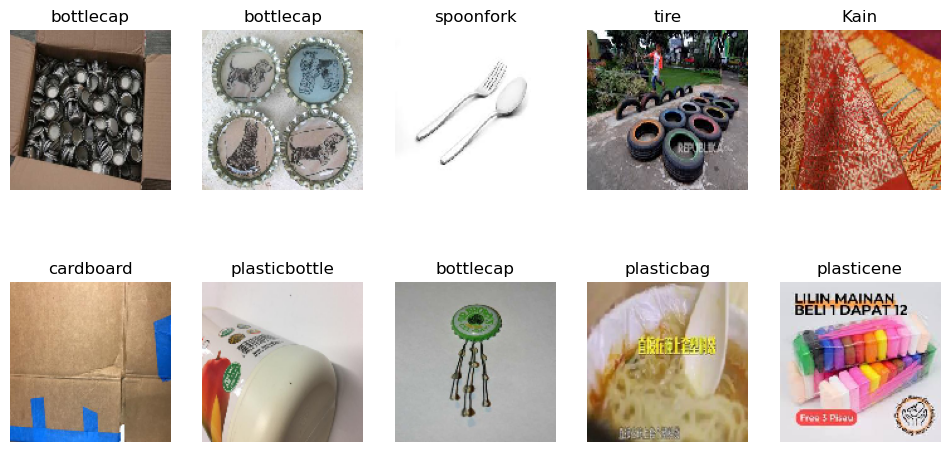

In [23]:
def plot_images(data_flow, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = next(data_flow)
        plt.subplot(2, 5, i+1)
        plt.imshow(img[0])  # Ambil gambar pertama dari batch
        plt.title(class_labels[np.argmax(label[0])])
        plt.axis("off")
    plt.show()

plot_images(data_flow)

In [24]:
img_shape = data_flow.image_shape
print("Dimensi gambar yang digunakan:", img_shape)

Dimensi gambar yang digunakan: (128, 128, 3)


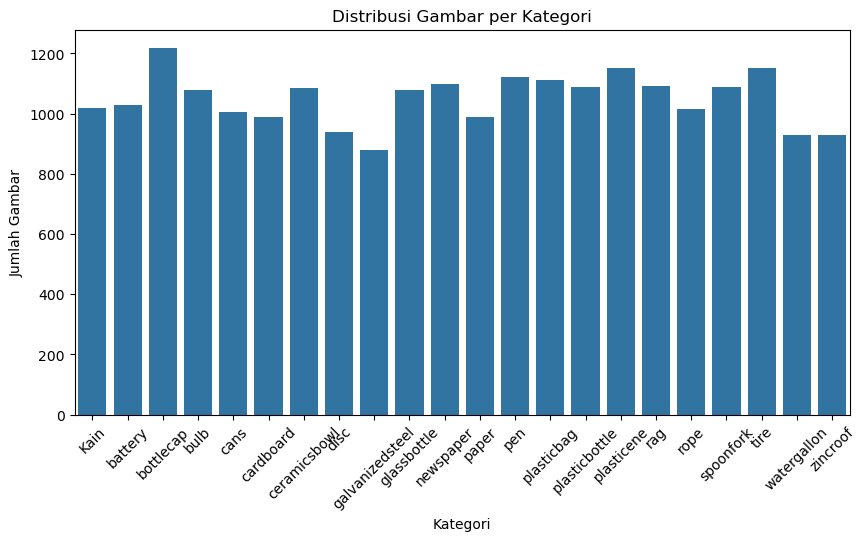

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Distribusi Gambar per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=45)
plt.show()

# Preprocessing Data

## Image Data Generator

In [26]:
target_size = (224, 224)
batch_size = 32

# Generator untuk train dan validation set (20% dari data training untuk validation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Split 20% untuk validation
)


## Load Dataset

In [29]:
# Flow untuk training data
train_flow = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Flow untuk validation data
val_flow = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Flow untuk test data
#test_flow = test_datagen.flow_from_directory(
#    test_dir,
#    target_size=target_size,
#    batch_size=batch_size,
#    class_mode='categorical',
#    shuffle=False  # Tidak diacak untuk evaluasi akhir
#)

Found 18479 images belonging to 22 classes.
Found 4608 images belonging to 22 classes.


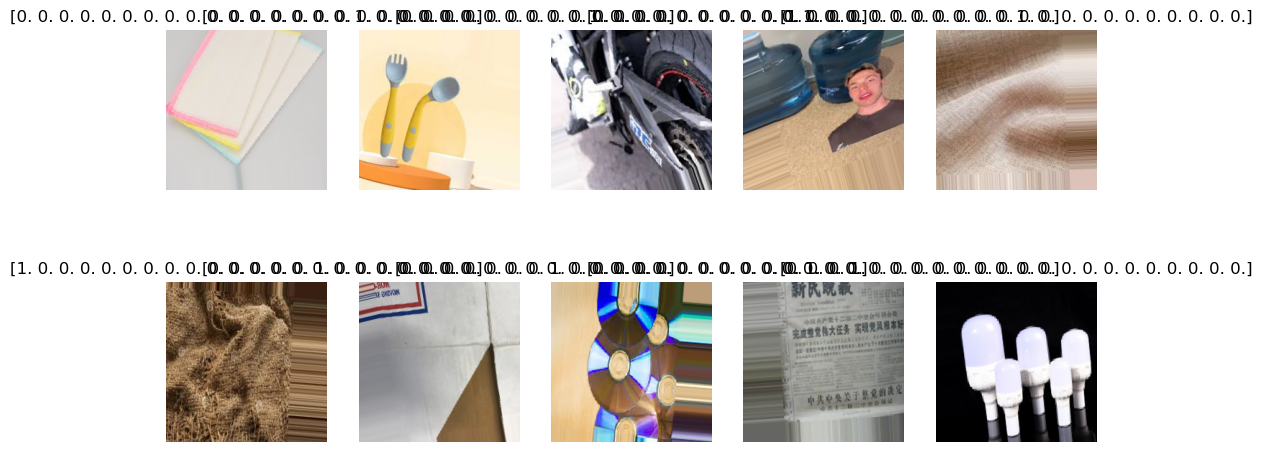

In [30]:
def plot_augmented_images(data_flow, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = next(data_flow)
        plt.subplot(2, 5, i+1)
        plt.imshow(img[0])  # Menampilkan gambar pertama dari batch
        plt.title(label[0])
        plt.axis("off")
    plt.show()

# Visualisasi beberapa gambar dari train_flow
plot_augmented_images(train_flow)

In [28]:
#from tensorflow.keras.layers import Dropout,Dense
#model = tf.keras.models.Sequential([ 
#		tf.keras.Input(shape=(224, 224, 3)),
#        # Convolution and Pooling layers
#        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#        tf.keras.layers.MaxPooling2D(2, 2),
#        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#        tf.keras.layers.MaxPooling2D(2, 2),
#        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
#        tf.keras.layers.MaxPooling2D(2, 2),
#        tf.keras.layers.GlobalAveragePooling2D(),
#        # Flatten the results to feed into a DNN
#        tf.keras.layers.Flatten(),
#        # 512 neuron hidden layer
#        Dropout(0.5),
#        tf.keras.layers.Dense(128, activation='relu'),
#        tf.keras.layers.Dense(total_label, activation='softmax')
#
#
#
#
#    ]) 
#
#  
#model.compile( 
#    loss='categorical_crossentropy',
#    optimizer="adam",
#    metrics=['accuracy']
#) 
#    
#    ### END CODE HERE #

In [31]:

base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [32]:
base_model.trainable = False

In [33]:
image_batch, label_batch = next(iter(train_flow))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [34]:
from tensorflow.keras.layers import Dropout,Dense

model = tf.keras.Sequential(
    [
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        tf.keras.layers.Dense(total_label, activation="softmax")
    ]
)

model.compile( 
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        metrics=['accuracy']
) 

In [13]:
model = create_model()

NameError: name 'create_model' is not defined

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         2,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,790 (9.25 MB)

 Trainable params: 166,806 (651.59 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [36]:
history = model.fit(
	train_flow,
	epochs=25,
	validation_data=val_flow,
)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
578/578 ━━━━━━━━━━━━━━━━━━━━ 1119s 2s/step - accuracy: 0.3634 - loss: 2.2419 - val_accuracy: 0.6491 - val_loss: 1.1518
Epoch 2/25
578/578 ━━━━━━━━━━━━━━━━━━━━ 1146s 2s/step - accuracy: 0.6554 - loss: 1.1655 - val_accuracy: 0.6764 - val_loss: 1.0824
Epoch 3/25
578/578 ━━━━━━━━━━━━━━━━━━━━ 1206s 2s/step - accuracy: 0.6918 - loss: 1.0347 - val_accuracy: 0.6999 - val_loss: 0.9942
Epoch 4/25
578/578 ━━━━━━━━━━━━━━━━━━━━ 896s 2s/step - accuracy: 0.7161 - loss: 0.9574 - val_accuracy: 0.7070 - val_loss: 0.9752
Epoch 5/25
578/578 ━━━━━━━━━━━━━━━━━━━━ 985s 2s/step - accuracy: 0.7343 - loss: 0.8857 - val_accuracy: 0.6970 - val_loss: 0.9821
Epoch 6/25
578/578 ━━━━━━━━━━━━━━━━━━━━ 1210s 2s/step - accuracy: 0.7407 - loss: 0.8489 - val_accuracy: 0.7140 - val_loss: 0.9550
Epoch 7/25
578/578 ━━━━━━━━━━━━━━━━━━━━ 1158s 2s/step - accuracy: 0.7503 - loss: 0.8145 - val_accuracy: 0.7294 - val_loss: 0.9289
Epoch 8/25
578/578 ━━━━━━━━━━━━━━━━━━━━ 857s 1s/step - accuracy: 0.7584 - loss: 0.7849 - val

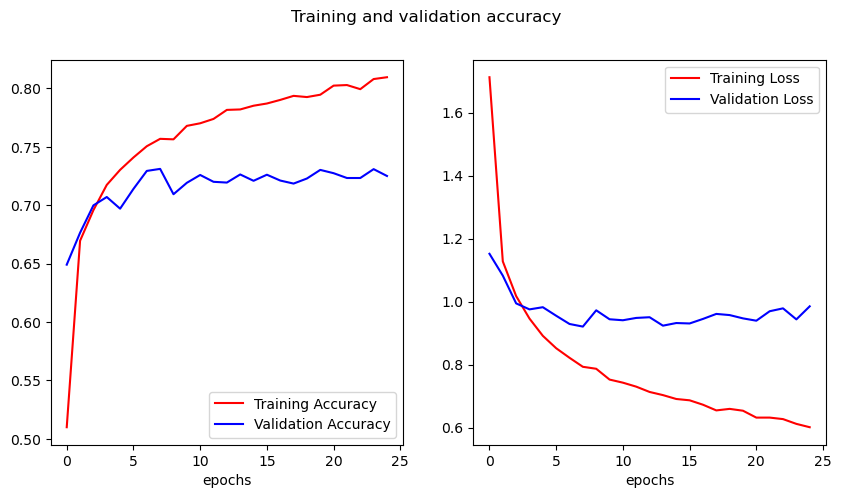

In [37]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [38]:
test_loss, test_accuracy = model.evaluate(test_flow)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

NameError: name 'test_flow' is not defined

In [55]:
model.save("garbage_classification_tf_v2.h5")

In [66]:
#tf.saved_model.save(model, "garbage_classification_tf_v2")
model.save("garbage_classification_tf_v2.keras")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=garbage_classification_tf_v2.pb.